In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
import datetime

%matplotlib inline

In [2]:
df = pd.read_csv("compressed_by_day.csv")

In [3]:
df.head()

,Unnamed: 0,Date_s,duration_sec,day_frequency,maxTemp,weekday,workingday,month,precip
0,0,2018-01-01,1616,1368,13.9,0,1,1,0
1,1,2018-01-02,984,3244,13.9,1,1,1,0
2,2,2018-01-03,802,2855,13.3,2,1,1,1
3,3,2018-01-04,786,3395,17.2,3,1,1,1
4,4,2018-01-05,746,2256,17.2,4,1,1,1


In [4]:
df.drop(['Unnamed: 0'], axis = 1, inplace= True)
df.head()

,Date_s,duration_sec,day_frequency,maxTemp,weekday,workingday,month,precip
0,2018-01-01,1616,1368,13.9,0,1,1,0
1,2018-01-02,984,3244,13.9,1,1,1,0
2,2018-01-03,802,2855,13.3,2,1,1,1
3,2018-01-04,786,3395,17.2,3,1,1,1
4,2018-01-05,746,2256,17.2,4,1,1,1


In [5]:
df["Date_s"] = pd.to_datetime(df["Date_s"])

In [6]:
df["Day_of_year"] = df.index+1
df

,Date_s,duration_sec,day_frequency,maxTemp,weekday,workingday,month,precip,Day_of_year
0,2018-01-01,1616,1368,13.9,0,1,1,0,1
1,2018-01-02,984,3244,13.9,1,1,1,0,2
2,2018-01-03,802,2855,13.3,2,1,1,1,3
3,2018-01-04,786,3395,17.2,3,1,1,1,4
4,2018-01-05,746,2256,17.2,4,1,1,1,5
...,...,...,...,...,...,...,...,...,...
360,2018-12-27,909,3400,16.1,3,1,12,0,361
361,2018-12-28,978,3360,16.1,4,1,12,0,362
362,2018-12-29,1029,2880,16.1,5,0,12,0,363
363,2018-12-30,1153,2668,13.9,6,0,12,0,364


<H3>How does the day of the year impact the number of rides per day?</H3>

In [7]:
# let us define our dependent (y) and independent (x) variables

xp = df['Day_of_year']

yp = df['day_frequency']

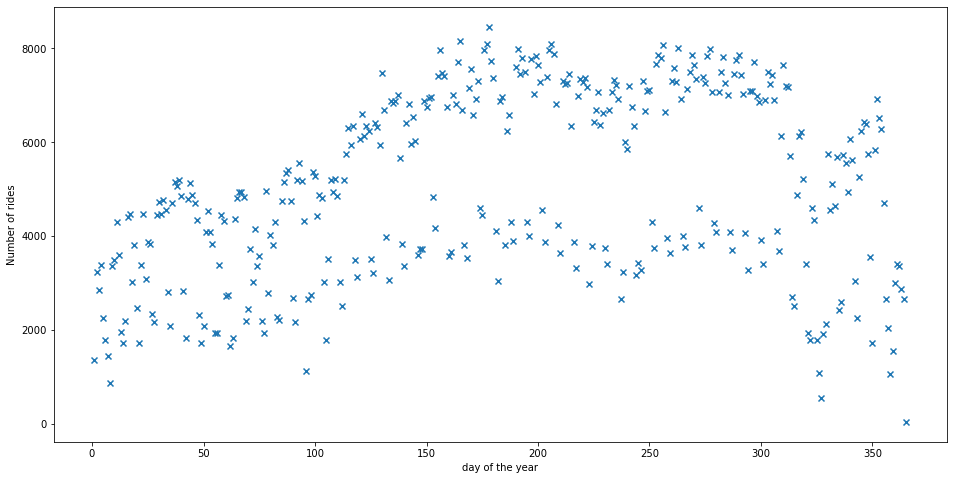

In [8]:
fig, ax = plt.subplots(figsize = (16,8))
# Plotting the data
ax.scatter(xp, yp, marker='x',)
ax.set_xlabel("day of the year")
ax.set_ylabel("Number of rides")

plt.show()

In [9]:
X = df['Day_of_year'].values.reshape((-1,1)) # if we pass a 1-feature array we need to re-shape it!
y = df['day_frequency']

In [10]:
# initialize model
linear_model = LinearRegression(fit_intercept=True, normalize=False)

In [11]:
# train model
linear_model.fit(X, y)
print(linear_model.coef_, linear_model.intercept_)


[5.2352517] 4063.9105825681163


In [12]:
linear_model.intercept_

4063.9105825681163

In [13]:
# predict on new data
Xnew = np.array([[25]]) #predict peak load on day 25

print(linear_model.predict(Xnew))

[4194.79187509]


[5.2352517] 4063.9105825681163


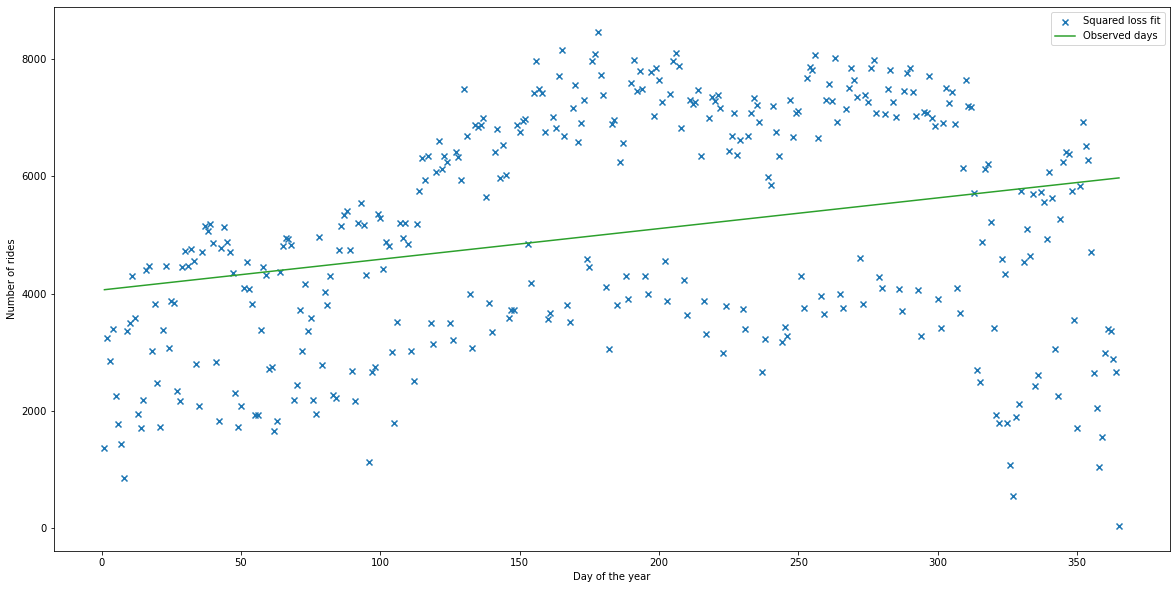

In [14]:
lr = LinearRegression()
lr.fit(xp.values.reshape(-1,1), yp)
model_pred = lr.predict(xp.values.reshape(-1,1))


fig,ax = plt.subplots(figsize = (20,10))

ax.scatter(xp, yp, marker="x")
ax.set_xlabel("Day of the year")
ax.set_ylabel("Number of rides")

ax.plot(xp, model_pred, c='C2')
ax.legend(['Squared loss fit','Observed days'])
print(lr.coef_, lr.intercept_)

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [16]:
y_true = df["day_frequency"]
y_pred = linear_model.predict(df["day_frequency"].values.reshape((-1,1)))

In [17]:
print("Mean Squared Error:",mean_squared_error(y_pred, y_true),"(GW)^2")
print("Root Mean Squared Error:",mean_squared_error(y_pred, y_true)**0.5,"GW")

Mean Squared Error: 711203358.3545727 (GW)^2
Root Mean Squared Error: 26668.396246391956 GW


In [18]:
print("Mean Absolute Error:",mean_absolute_error(y_pred, y_true),"GW")

Mean Absolute Error: 25333.182176554295 GW


In [19]:
print("Coefficient of determination:",r2_score(y_pred, y_true))

Coefficient of determination: -5.7036246690699475


<H1>Now lets focus on polynomial regression</H1>

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
xp = df["Day_of_year"].values
yp = df["day_frequency"].values

In [22]:
def plot_regression_poly_scikit(X,Y,d):
    
    # initialize PolynomialFeatures
    poly_reg = PolynomialFeatures (degree = d)
    
    # Polynomial transformation
    x_poly = poly_reg.fit_transform(X.reshape(-1,1))
    
    # Fitting linear regression to polynomial features
    lin_reg_Poly = LinearRegression()
    lin_reg_Poly.fit(x_poly, Y)
    model_pred = lin_reg_Poly.predict(x_poly)
    
    # Plotting the regression line and the data (we have to transform the inputs as well!)
    x_fit = np.arange(X.min(),X.max() ,1)[:, np.newaxis]
    y_pred = lin_reg_Poly.predict(poly_reg.fit_transform(x_fit.reshape(-1,1)))
    
    plt.figure(figsize = (8,6))
    plt.scatter(X,Y,marker="x", c='C2')
    ylim = plt.ylim()
    plt.plot(x_fit,y_pred, c='C1')
    plt.title("Regression with 4 degree polynomial")
    plt.xlabel("Day of the year")
    plt.ylabel("Number of rides")
    plt.xlim([X.min()-2,X.max()+2]) # leave some space before and after limits
    plt.ylim(ylim)
    plt.savefig("RegressionDOYDaily.pdf")
    print ('The R^2 for quadratic curve is: ',r2_score(Y, model_pred))
    #print(lin_reg_Poly.coef_)

The R^2 for quadratic curve is:  0.32295134468556874


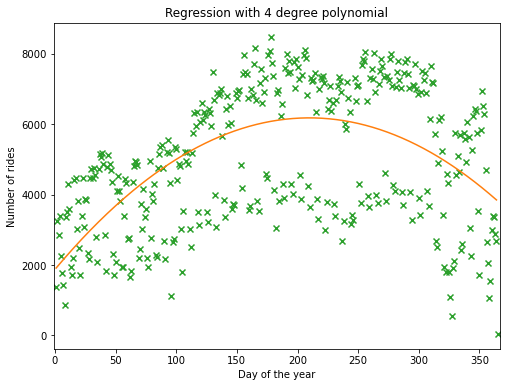

In [23]:
plot_regression_poly_scikit(X = xp, Y = yp, d = 2)

The R^2 for quadratic curve is:  0.3596773096850807


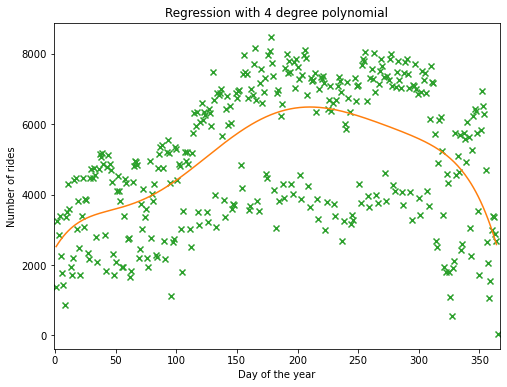

In [24]:
plot_regression_poly_scikit(X = xp, Y = yp, d = 6)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# split the data with 70-30% split 
x_train, x_test, y_train, y_test = train_test_split(df["Day_of_year"], df["day_frequency"], test_size=0.3,random_state=33)

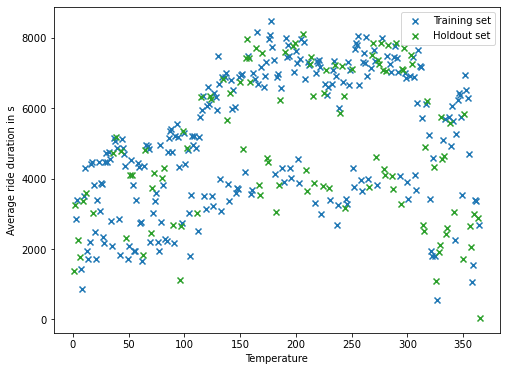

In [27]:
plt.figure(figsize = (8,6))
plt.scatter(x_train, y_train, marker='x', color="C0")
plt.scatter(x_test, y_test, marker='x', color="C2")
plt.xlabel("Temperature")
plt.ylabel("Average ride duration in s")
plt.legend(['Training set', 'Holdout set'])
plt.show()

In [28]:
def ls_poly(x, y, d):
    
    # Create polynomial features
    min_x, max_x = x.min(), x.max()
    xs = 2*(x - min_x)/(max_x - min_x)-1  # standardize to range [-1,1]
    X = np.array([xs**i for i in range(d,-1,-1)]).T
    
    # Implement polynomial regression using least squares (we use the nomal equations as derived in the lecture)
    theta = np.linalg.solve(X.T @ X, X.T @ y)
    
    return theta

Text(0, 0.5, 'Mean squared error')

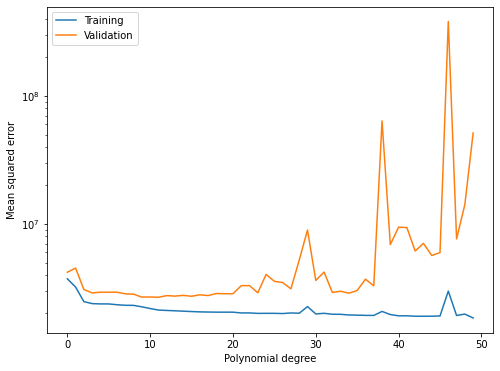

In [29]:
min_x_train, max_x_train = x_train.min(), x_train.max()
x_train = 2*(x_train - min_x_train)/(max_x_train - min_x_train) - 1
x_test = 2*(x_test - min_x_train)/(max_x_train - min_x_train) - 1

def poly_feat(x, degree):
    return np.array([x**i for i in range(degree,-1,-1)]).T
    

err_train = []
err_cv = []
for i in range(50):
    theta = ls_poly(x_train, y_train, i)
    err_train.append(((poly_feat(x_train,i) @ theta - y_train)**2).mean())
    err_cv.append(((poly_feat(x_test,i) @ theta - y_test)**2).mean())

plt.figure(figsize = (8,6))
plt.semilogy(range(50), err_train, range(50), err_cv)
plt.legend(["Training", "Validation"])
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")

Text(0, 0.5, 'Mean squared error')

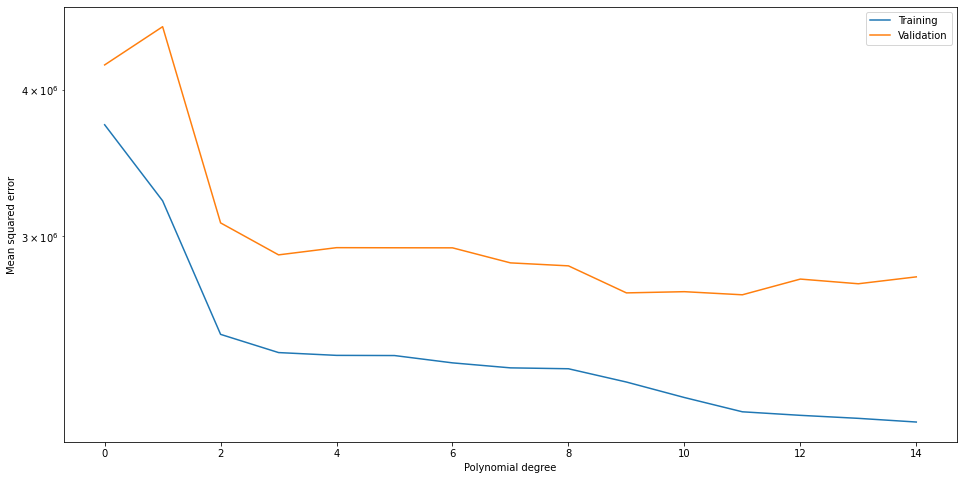

In [30]:
min_x_train, max_x_train = x_train.min(), x_train.max()
x_train = 2*(x_train - min_x_train)/(max_x_train - min_x_train) - 1
x_test = 2*(x_test - min_x_train)/(max_x_train - min_x_train) - 1

def poly_feat(x, degree):
    return np.array([x**i for i in range(degree,-1,-1)]).T
    

err_train = []
err_cv = []
for i in range(15):
    theta = ls_poly(x_train, y_train, i)
    err_train.append(((poly_feat(x_train,i) @ theta - y_train)**2).mean())
    err_cv.append(((poly_feat(x_test,i) @ theta - y_test)**2).mean())

plt.figure(figsize = (16,8))    
plt.semilogy(range(15), err_train, range(15), err_cv)
plt.legend(["Training", "Validation"])
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")

### Sweet spot between 4 and 6 degrees of the polynomial

Now we do the same thing but split the data into three parts.

In [31]:
# Do a 70-30 split first
X_train, X_test, y_train, y_test = train_test_split(xp, yp, test_size=0.3,random_state=34 )

# now split X_train to achive 50-20-30 split
X_train, X_hold, y_train, y_hold = train_test_split(X_train, y_train, test_size=(0.2/0.7),random_state=34)

Check if split is correct

In [32]:
print(len(X_train),len(X_hold),len(X_test))

182 73 110


Text(0, 0.5, 'Mean squared error')

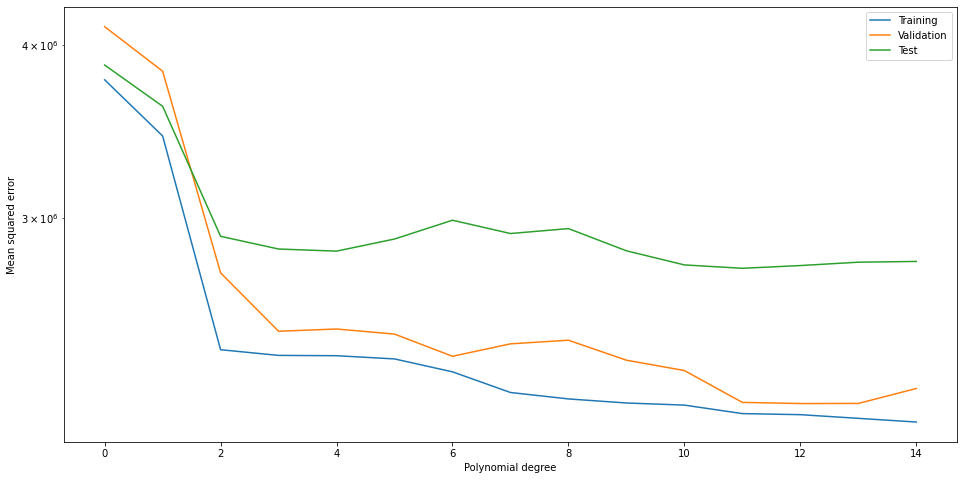

In [33]:
min_x_train, max_x_train = X_train.min(), X_train.max()
x_train = 2*(X_train - min_x_train)/(max_x_train - min_x_train) - 1
x_hold = 2*(X_hold - min_x_train)/(max_x_train - min_x_train) - 1
x_test = 2*(X_test - min_x_train)/(max_x_train - min_x_train) - 1

def poly_feat(x, degree):
    return np.array([x**i for i in range(degree,-1,-1)]).T
    

err_train = []
err_hold = []
err_test = []
for i in range(15):
    theta = ls_poly(x_train, y_train, i)
    err_train.append(((poly_feat(x_train,i) @ theta - y_train)**2).mean())
    err_hold.append(((poly_feat(x_hold,i) @ theta - y_hold)**2).mean())
    err_test.append(((poly_feat(x_test,i) @ theta - y_test)**2).mean())
plt.figure(figsize = (16,8)) 
plt.semilogy(range(15), err_train, range(15), err_hold,range(15), err_test)
plt.legend(["Training", "Validation", "Test"])
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")